## compare results of finetuning v. modified training of AlexNet


In [1]:
from pathlib import Path

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import searchnets

In [2]:
results_dir = Path('../../../data/results/')
data_prep_dir = Path('../../../data/data_prepd_for_nets/')

In [3]:
csv_path = '../../../data/csv/alexnet_finetune_v_train.csv'

In [4]:
searchnets.utils.general.results_df(data_prep_dir,
                                    results_dir,
                                    nets=('alexnet',),
                                    train_types=('finetune', 'train'),
                                    stims=('2_v_5', 'RVvGV', 'RVvRHGV'),
                                    target_condition=('present', 'absent', 'both'),
                                    csv_path=csv_path)

,net_name,train_type,net_number,stimulus,set_size,target_condition,accuracy,hit_rate,false_alarm_rate,d_prime
0,alexnet,finetune,1,2_v_5,1,present,0.810,NaN,NaN,NaN
1,alexnet,finetune,1,2_v_5,2,present,0.630,NaN,NaN,NaN
2,alexnet,finetune,1,2_v_5,4,present,0.500,NaN,NaN,NaN
3,alexnet,finetune,1,2_v_5,8,present,0.590,NaN,NaN,NaN
4,alexnet,finetune,1,2_v_5,1,absent,0.730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
571,alexnet,train,8,RVvRHGV,8,absent,1.000,NaN,NaN,NaN
572,alexnet,train,8,RVvRHGV,1,both,1.000,0.995000,0.005000,5.151659
573,alexnet,train,8,RVvRHGV,2,both,0.995,0.994949,0.009901,4.902431
574,alexnet,train,8,RVvRHGV,4,both,0.995,0.994949,0.009901,4.902431


In [5]:
atft_df = pd.read_csv(csv_path)

In [6]:
pal = sns.color_palette('muted')

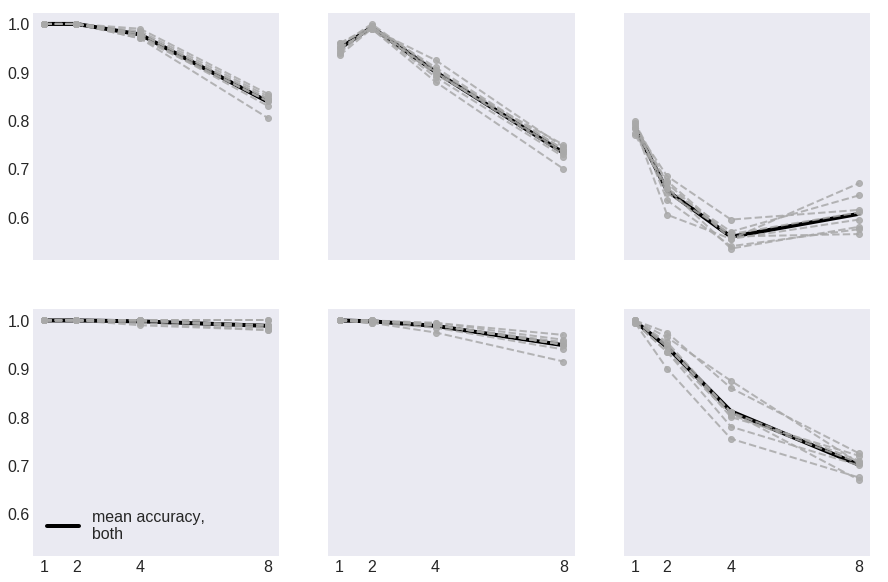

In [8]:
save_as = '../../static/fig3/alexnet-finetune-v-train-ipynb.png'

figsize=(15,10)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

net_name = 'alexnet'
for row, train_type in enumerate(['finetune', 'train']):
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['feature', 'conjunction', 'spatial configuration'],
        ['RVvGV', 'RVvRHGV', '2_v_5'])):
            if row==1 and col==0:
                add_legend=True
            else:
                add_legend=False

            both_color = pal[0]
            mn_both_color = pal[0]
                
            searchnets.plot.metric_v_set_size_df(df=atft_df, net_name=net_name,
                                                 train_type=train_type, 
                                                 stimulus=stim_abbrev,
                                                 metric='accuracy', 
                                                 conditions=['both'],
                                                 set_ylim=False,
                                                 ax=ax[row, col],
                                                 ylim=(0.5, 1.05),
                                                 add_legend=add_legend,
                                                 save_as=save_as)

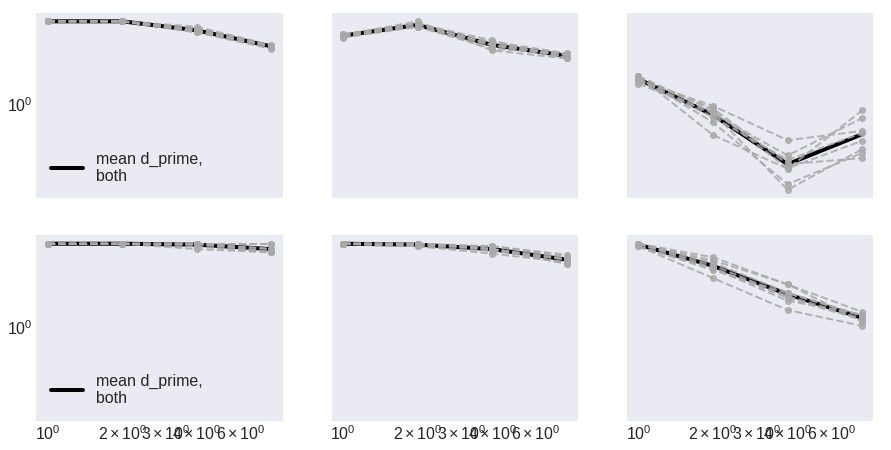

In [10]:
figsize=(15,7.5)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)


net_name = 'alexnet'
for row, train_type in enumerate(['finetune', 'train']):
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['feature', 'conjunction', 'spatial configuration'],
        ['RVvGV', 'RVvRHGV', '2_v_5'])):
            if col==0:
                add_legend=True
            else:
                add_legend=False

            both_color = pal[0]
            mn_both_color = pal[0]
                
            searchnets.plot.metric_v_set_size_df(df=atft_df, net_name=net_name,
                                                 train_type=train_type, 
                                                 stimulus=stim_abbrev,
                                                 metric='d_prime', 
                                                 conditions=['both'],
                                                 set_ylim=False,
                                                 ax=ax[row, col], 
                                                 add_legend=add_legend)
            ax[row, col].set_yscale('log')
            ax[row, col].set_xscale('log')